<a href="https://colab.research.google.com/github/anyuanay/INFO213/blob/main/INFO213_Week3_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 213: Data Science Programming 2
___

### Week 3: Introduction to Scikit-Learn Library and Logistic Regression
___


**Agenda:**
- Introduction to the scikit-learn machine learning library
- Introduction to robust and popular algorithms for classification, such as logistic regression.
- Linear and nonlinear decision boundaries
- Regularization

# The five main steps for training a supervised machine learning algorithm (Your final project should have these components too):
- Selecting features and collecting labeled training examples.
- Choosing a performance metric.
- Choosing a classifier and optimization algorithm.
- Evaluating the performance of the model.
- Tuning the algorithm.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# First steps with scikit-learn
- The scikit-learn API combines a user-friendly and consistent interface with a highly optimized implementation of several classification algorithms.
- It offers many convenient functions to preprocess data and to fine-tune and evaluate our models.
- To get started with the scikit-learn
library, we will train a perceptron model similar to the one that we implemented before.
- We will use the already familiar Iris dataset that is already available via scikit-learn.

## Load the Iris Dataset
Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where `0=Iris-Setosa`, `1=Iris-Versicolor`, `2=Iris-Virginica`.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Split data into 70% training and 30% test data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


## Standardize the features

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train a perceptron via scikit-learn

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=123)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=123)

In [8]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 15


We can calculate the classification accuracy of the perceptron on the testdataset as follows:

In [9]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.667


Alternatively, each classifier in scikit-learn has a score
method, which computes a classifier's prediction accuracy by combining the predict call with accuracy_score, as shown here:

In [10]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.667


## Visualization

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]


        plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')

## Plot a perceptron model using the standardized training data:

<ipython-input-11-3a2422982984>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


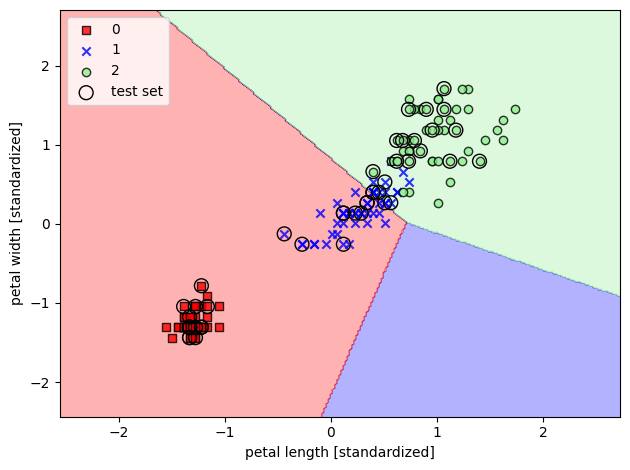

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

# Retrieval Practice

# Logistic Regression
We will now take a look at another simple, yet more powerful, algorithm for linear and binary classification problems: logistic regression
- In spite of its name, logistic regression is a model for classification, not regression.
- It is one of the most widely used algorithms for classification in industry.

## Logistic Sigmoid Function
- To explain the idea behind logistic regression as a probabilistic model for classification, let's first introduce the logistic sigmoid function, or simply, sigmoid function:
\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

- The sigmoid function transforms any real number to a value between 0 and 1 as demonstrated in the following program:

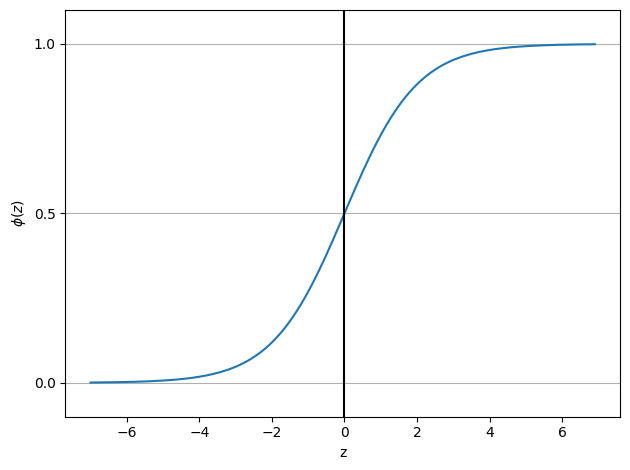

In [14]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

## Logistic Regression Uses Sigmoid Function as the Activation Function
- In Adaline, we used the identity function, $\phi(z)$, as the activation function.
- In logistic regression, this activation function simply becomes the sigmoid function.
<img src="https://github.com/rasbt/machine-learning-book/blob/main/ch03/figures/03_03.png?raw=true" width=800>

## Logistic Regression and Conditional Probability
- The output of the sigmoid function is then interpreted as the probability of a particular example belonging to class 1, $Pr(y=1|\mathbf{x}, \mathbf{w})$, given its features, $\mathbf{x}$, parameterized by the weights, $\mathbf{w}$.
- Specifically,
\begin{equation}
\phi(z) = \sigma(z) = Pr(y=1|\mathbf{x}, \mathbf{w}) = \frac{1}{1+e^{-z}}
\end{equation}
 - where, $z=w_0x_0+w_1x_1+...+w_mx_m = \mathbf{w}^T\mathbf{x}$
- The predicted probability can then simply be converted into a binary outcome via a threshold function:
\begin{equation}
    \bar{y}=
\begin{cases}
    1,& \text{if } \phi(z)\geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
\end{equation}
- If we look at the preceding plot of the sigmoid function, this is equivalent to the following:
\begin{equation}
    \bar{y}=
\begin{cases}
    1,& \text{if }  z\geq 0\\
    0,              & \text{otherwise}
\end{cases}
\end{equation}

## Define the Cost Function for Logistic Regression
- In logistic regression, the cross-entropy (or log loss) cost function is commonly used to measure the difference between the predicted probability and the actual class label of a binary classification problem.
- For a single training example with a true label $y$ (where
$y$ is either 0 or 1) and a predicted probability $\phi(z)$ (the output of the logistic regression model), the cross-entropy loss is given by:
\begin{equation}
cross\_entropy\_loss=-y log(\phi(z))-(1-y)log(1-\phi(z)).
\end{equation}
 - When $y=1$, the loss becomes $-log(\phi(z))$. This term penalizes the model more when the predicted probability is closer to 0 (indicating a higher error).
 - When $y=0$, the loss becomes $-log(1-\phi(z))$. This term penalizes the model more when the predicted probability is closer to 1 (indicating a higher error).
- Let us plot the function $-log(x)$:


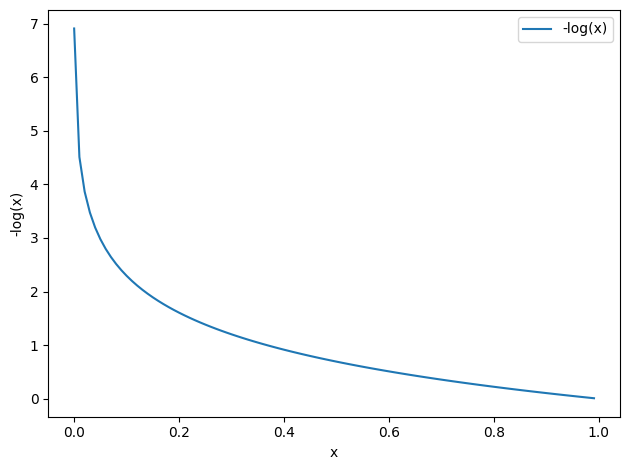

In [18]:
def loss(x):
    return - np.log(x)


x = np.arange(0.001, 1, 0.01)
loss_x = loss(x)

plt.plot(x, loss_x, label='-log(x)')

plt.xlabel('x')
plt.ylabel('-log(x)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- For the entire training data with $m$ examples, the cross-entropy loss function is defined as:
\begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\phi(z^{(i)}))+(1-y^{(i)}) log(1-\phi(z^{(i)})))
\end{equation}

## Derive the Cost Function from the Likelihood Function
- Assume the the individual examples in the dataset are independent. The likelihood, $L$, that we want to maximize when we build a logistic regression model is:
\begin{equation}
 L(\mathbf{w}) = Pr(\mathbf{y}|\mathbf{x}, \mathbf{w})=\Pi_i (y^{(i)}|x^{(i)}, \mathbf{w}) = \Pi_i (\phi(z^{(i)})^{y^{(i)}}\times (1-\phi(z^{(i)})^{1-{y}^{(i)}})
\end{equation} where $\phi(z^{(i)}) = Pr(y^{(i)}=1|x^{(i)}, \mathbf{w})$.
- In practice, it is easier to maximize the (natural) log of this equation, which is called the log-likelihood function:
\begin{equation}
 l(\mathbf{w}) = log(L(\mathbf{w})) = \Sigma_i(y^{(i)}log(\phi(z^{(i)}))+ (1-{y}^{(i)})log(1-(\phi(z^{(i)})))
\end{equation}
- The cross-entropy loss function is the negative of the log-likelihood: $J(\mathbf{w}) = - l(\mathbf{w})$. The loss can be visualized as:

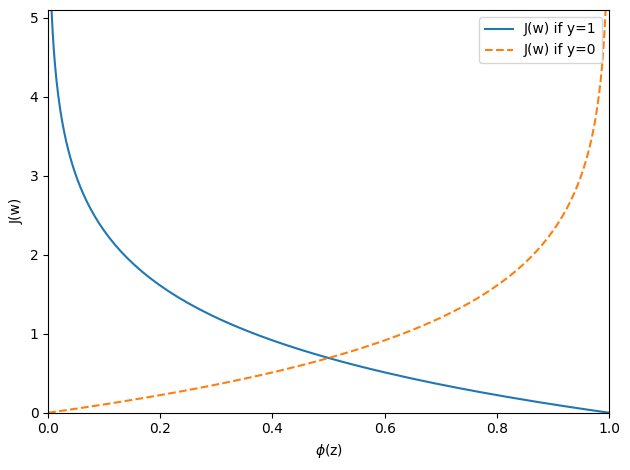

In [19]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('images/03_04.png', dpi=300)
plt.show()

## Update the weights by gradient descent (The same as in Adaline learning):
- Update the weights by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$ of our cost function $J(\mathbf{w})$:
 - $\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$, where $\Delta \mathbf{w}= - \eta \nabla J(\mathbf{w})$.
- To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight, $w_j$:
\begin{equation}
\frac{\partial J}{\partial w_j} = - \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{equation}
- Let us derive the above partial derivative. (In the following picture, The symbol $L$ is the cost function symbol $J$ above.)

![](https://github.com/rasbt/machine-learning-book/blob/main/ch03/figures/03_25.png?raw=true)

- Each $w_j$ is updated:
\begin{equation}
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)}
\end{equation}
- However, the activation functions are different for Adaline and logistic regression:
 - For Adaline, $\phi(z^{(i)}) = z^{(i)}$
 - For logistic regression: $\phi(z^{(i)}) = \frac{1}{1+e^{-z^{(i)}}}$
- Calculate the loss: \begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\phi(z)^{(i)})+(1-y^{(i)}) log(1-\phi(z)^{(i)}))
\end{equation}

## Manual exercise on single variable input
- Input: $\mathbf{x}^1 = 0.5$ and $\mathbf{x}^2 = 2$
- Set the learning rate $\eta=1$
- True labels: $y^1 = 0$ and $y^2 = 1$.
- Initial weights: $\mathbf{w}= [w_0, w_1] = [1, -1]$
- In the first epoch:
 - $ z^1 = 1 + (-1 \times 0.5) = 0.5$, so $\phi(z^1) = \frac{1}{1+e^-0.5} = 0.6225$
 - $ z^2 = 1 + (-1 \times 2) = -1$, so $\phi(z^2) = \frac{1}{1+e^{-(-1)}}=0.2689$
 - errors = $y^i - \phi(z^i) = [0-0.6225, 1-0.2689] = [-0.6225, 0.7311]$
 - update the weight $w_0$ : $\Delta w_0 = \eta \Sigma(errors)=\eta \Sigma_i(y^i - \phi(z^i))= 1(-0.6225+0.7311) = 0.1086$, $w_0 := w_0 + \Delta w_0 = 1 + 0.1086 = 1.1086$
 - update the weight $w_1$: $\Delta w_1 = \eta \Sigma_i (y^i - \phi(z^i)) x_i =1[(-0.6225\times0.5)+(0.7311\times 2)]=1.1510$, $w_1 := w_1 + \Delta w_1 = -1 + 1.1510 = 0.1510$
 - The new weights are: $\mathbf{w}= [w_0, w_1] = [1.1086, 0.1510]$
 - The loss is $-\Sigma_i(y^{(i)} log(\phi(z^{(i)}))+(1-y^{(i)}) log(1-\phi(z^{(i)})))=-(1-0)log(1-\phi(z^{(1)})) -1 log(\phi(z^{(2)})) = -log(1-0.6225)-log(0.2689)=0.9742+1.3134=2.2876$
 - Continue to update the weights in next epoch.



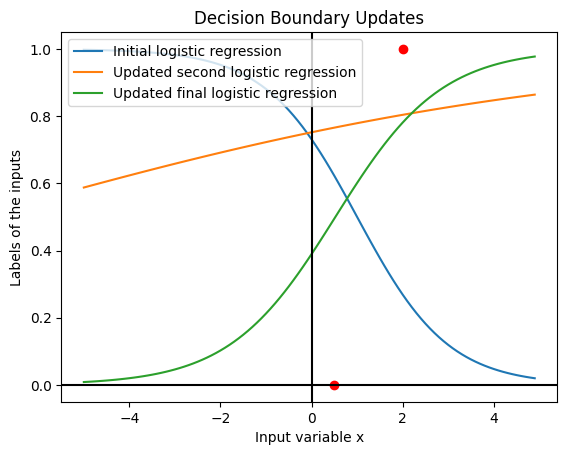

In [25]:
# plot (0.5, 0) and (2, 1) and decision bounary f(1/1+e^(1-x))); on the plot, add x-axis for y=0 and y-axis for x=0

import matplotlib.pyplot as plt

# plot sigmoid of y = w0 + w1*x at given x1 and x2
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def plot_sigmoid(w0, w1, leg):
  x = np.arange(-5, 5, 0.1)
  z = w0 + w1 * x
  phi_z = sigmoid(z)
  plt.plot(x, phi_z, label=leg)

def plot_point(x, y):
  plt.scatter(x, y, color='red')

def plot_axis():
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')

plot_point(0.5, 0)
plot_point(2, 1)

# 1-x
plot_sigmoid(1, -1, 'Initial logistic regression')
# 1.1086+0.1510x
plot_sigmoid(1.1086, 0.1510, 'Updated second logistic regression')
# -0.45+0.86x
plot_sigmoid(-0.45, 0.86, 'Updated final logistic regression')


plot_axis()

plt.legend(loc=2)

plt.xlabel("Input variable x")
plt.ylabel("Labels of the inputs")

plt.title("Decision Boundary Updates")

plt.show()


# Retrieval Practice

In [22]:
import numpy as np

def computeZ(x, w0, w1):
    """
    compute the output z value given an input and the weights
    input: x: the value of the input variable
           w0: the weight of the bias
           w1: the weight of the variable
    output: the value of linear combination
    """
    return w0 + w1 * x

def sigmoid(z):
    """
    compute the sigmoid activation of the given value
    input: z: given value
    output: sigmoid of the input value
    """

    return 1.0 / (1.0 + np.exp(-z))

def predict(x, w0, w1):
    """
    predict the label of input x by the perceptron
    input: x: the input value
           w0: the weight of the bias
           w1: the weight of the variable
    output: predicted label of x 1 or 0
    """

    z = computeZ(x, w0, w1)

    if z >= 0:
        return 1
    else:
        return 0

def fit(eta, epochs, X, y, w0, w1, verbose=False):
    """
    fit a single variable logistic regression model by updating the given weights
    input: eta: learning rate
           epochs: the number of learning iterations
           X: a vector of input values
           y: a vector of true labels corresponding to the input values
           w0: the weigth of bias
           w1: the weight of the variable
           verbose: a boolean value; if True, print out the intermediate values
    output: (w0, w1): the weights after logistic regression learning
            losses: the cost in each epoch
    """

    losses = []

    for ep in range(epochs):
        delta0 = 0
        delta1 = 0
        loss = 0
        for idx, x in enumerate(X):
            z = computeZ(x, w0, w1)
            if verbose:
                print("Epoch {}: x is {}, y is {}, z is {}, sigmoid(z) is {}".format(ep, x, y[idx], z, sigmoid(z)))
            error = y[idx] - sigmoid(z)

            delta0 += error
            delta1 += error * x

            loss += - (y[idx]*np.log(sigmoid(z)) + (1-y[idx]) * np.log(1-sigmoid(z)))


        w0 = w0 + eta * delta0
        w1 = w1 + eta * delta1
        if verbose:
            print("The updated weights are: w0={} and w1={}".format(w0, w1))

        losses.append(loss)

    return (w0, w1), losses

In [23]:
weights, losses = fit(1, 5, [0.5, 2], [0, 1], 1, -1, verbose=True)

Epoch 0: x is 0.5, y is 0, z is 0.5, sigmoid(z) is 0.6224593312018546
Epoch 0: x is 2, y is 1, z is -1, sigmoid(z) is 0.2689414213699951
The updated weights are: w0=1.1085992474281503 and w1=0.15088749165908255
Epoch 1: x is 0.5, y is 0, z is 1.1840429932576915, sigmoid(z) is 0.7656739658699856
Epoch 1: x is 2, y is 1, z is 1.4103742307463154, sigmoid(z) is 0.8038249629371108
The updated weights are: w0=0.5391003186210539 and w1=0.16040058284986813
Epoch 2: x is 0.5, y is 0, z is 0.6193006100459879, sigmoid(z) is 0.6500594665410101
Epoch 2: x is 2, y is 1, z is 0.8599014843207902, sigmoid(z) is 0.7026400711850346
The updated weights are: w0=0.18640078089500922 and w1=0.43009070720929393
Epoch 3: x is 0.5, y is 0, z is 0.40144613449965616, sigmoid(z) is 0.5990350598258698
Epoch 3: x is 2, y is 1, z is 1.0465821953135972, sigmoid(z) is 0.7401180469722765
The updated weights are: w0=-0.15275232590313703 and w1=0.6503370833518061
Epoch 4: x is 0.5, y is 0, z is 0.172416215772766, sigmoid(z

In [26]:
losses

[np.float64(2.2873386716983295),
 np.float64(1.6694155664243902),
 np.float64(1.402902551399412),
 np.float64(1.2148268690559294),
 np.float64(1.0586473661424631)]

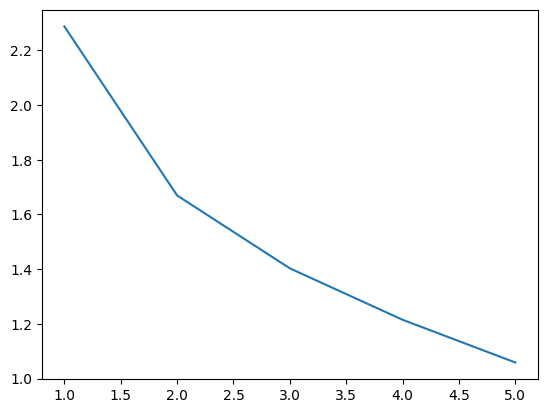

In [27]:
plt.plot(range(1, len(losses)+1), losses)

In [28]:
import random
def generateXy_LR():
    """
    Generate 25 random values that are in [-2, 1] with label 0 and
    25 random values that are in [0, 3] with label 1.
    The values are used for training a single variable logistic regression.
    Input: None
    Output: (X, y): 25 values in [-2, 1] with label 0
                    and 25 values in [0, 3] with label 1
    """

    # Generate 25 random points that x < 1 and y = 0
    np.random.RandomState(1234)

    x1 = np.random.uniform(-2, 1, size=25)
    y1 = np.ones(len(x1)) * 0

    # Generate 25 random points that x > 0 and y = 1
    x2 = np.random.uniform(0, 3, size=25)
    y2 = np.ones(len(x2))

    x12 = np.concatenate((x1, x2))
    y12 = np.concatenate((y1, y2))

    Xy = list(zip(x12, y12))
    random.shuffle(Xy)

    return Xy

In [29]:
Xy = generateXy_LR()

In [30]:
X, y = zip(*Xy)

In [31]:
w0 = 1
w1 = -1
weights, losses = fit(0.1, 20, X, y, w0, w1)

In [32]:
print("The learned weights: w0={} and w1={}".format(weights[0], weights[1]))

The learned weights: w0=-1.4698517833822555 and w1=3.6718111995020672


In [33]:
losses

[np.float64(72.80996858367162),
 np.float64(16.458221263596624),
 np.float64(12.998899175035044),
 np.float64(11.628687639034952),
 np.float64(11.14879460909948),
 np.float64(10.967377209912003),
 np.float64(10.874719311914749),
 np.float64(10.811405886117731),
 np.float64(10.761469605061825),
 np.float64(10.71993134901346),
 np.float64(10.684646850934767),
 np.float64(10.654348015891863),
 np.float64(10.62813752338376),
 np.float64(10.605329565899927),
 np.float64(10.585382048682977),
 np.float64(10.567858627194683),
 np.float64(10.552403688853927),
 np.float64(10.538724528118026),
 np.float64(10.526578156369311),
 np.float64(10.515761326243448)]

Text(0.5, 1.0, 'Losses vs Epochs')

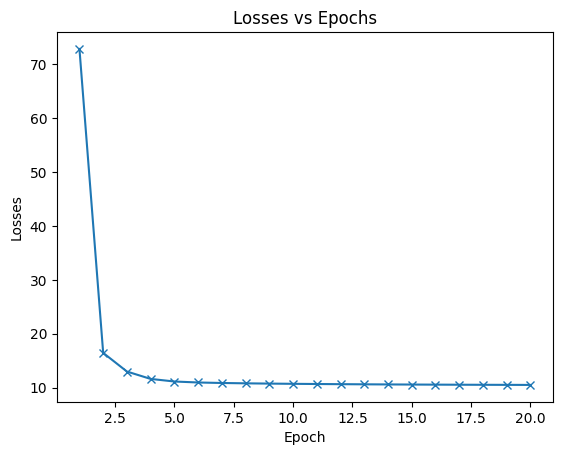

In [34]:
plt.plot(range(1, len(losses) + 1), losses, marker='x')
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Losses vs Epochs")

In [35]:
# Classification accuracy
error = 0
for x, y in Xy:
    ypred = predict(x, weights[0], weights[1])
    if y != ypred:
        error += 1

error / 50

0.1

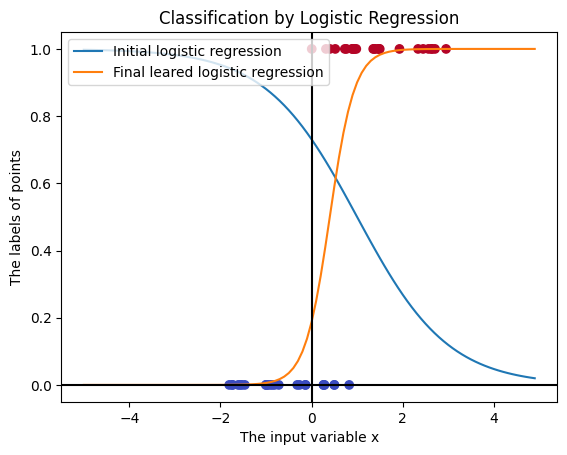

In [36]:
# plot the points and the final model

# Plot the points
X, y = zip(*Xy)
plt.scatter(X, y, c=y, cmap="coolwarm")

# plot sigmoid of y = w0 + w1*x at given x1 and x2
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def plot_sigmoid(w0, w1, leg):
  x = np.arange(-5, 5, 0.1)
  z = w0 + w1 * x
  phi_z = sigmoid(z)
  plt.plot(x, phi_z, label=leg)

# 1-x
plot_sigmoid(1, -1, 'Initial logistic regression')

# final model
plot_sigmoid(weights[0], weights[1], 'Final leared logistic regression')

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.xlabel("The input variable x")
plt.ylabel("The labels of points")
plt.title("Classification by Logistic Regression")

plt.legend(loc=2)

plt.show()


In [37]:
w0 = 1
w1 = -1
etas = [1, 0.01, 0.1, 0.5]
weights_list = []
losses_list = []
for eta in etas:
    Xy = generateXy_LR()
    X, y = zip(*Xy)
    weights, losses = fit(eta, 20, X, y, w0, w1)
    weights_list.append(weights)
    losses_list.append(losses)

<ipython-input-22-f4db3ed20119>:67: RuntimeWarning: divide by zero encountered in log
  loss += - (y[idx]*np.log(sigmoid(z)) + (1-y[idx]) * np.log(1-sigmoid(z)))
<ipython-input-22-f4db3ed20119>:67: RuntimeWarning: invalid value encountered in scalar multiply
  loss += - (y[idx]*np.log(sigmoid(z)) + (1-y[idx]) * np.log(1-sigmoid(z)))


In [38]:
weights_list

[(np.float64(-0.3057280467778565), np.float64(15.25234764986562)),
 (np.float64(-0.19293533016562722), np.float64(1.5564980018860157)),
 (np.float64(-2.192303262454481), np.float64(3.145892420982133)),
 (np.float64(0.6909741763203119), np.float64(6.561904485084774))]

In [39]:
# Classification accuracy
error = 0

for x, y in Xy:
    ypred = predict(x, 1, -1)
    if y != ypred:
        error += 1

error / 50

0.78

In [40]:
# Classification accuracy
error = 0
weights = weights_list[2]
for x, y in Xy:
    ypred = predict(x, weights[0], weights[1])
    if y != ypred:
        error += 1

error / 50

0.14

In [41]:
X, y = zip(*Xy)

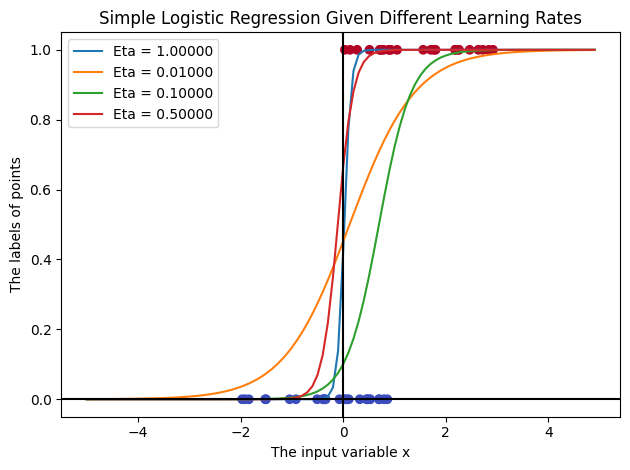

In [42]:
# plot the points and the models based on different eta

# Plot the points
X, y = zip(*Xy)
plt.scatter(X, y, c=y, cmap="coolwarm")

# plot sigmoid of y = w0 + w1*x at given x1 and x2
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def plot_sigmoid(w0, w1, leg):
  x = np.arange(-5, 5, 0.1)
  z = w0 + w1 * x
  phi_z = sigmoid(z)
  plt.plot(x, phi_z, label=leg)

# Plot the line y = weights[0] + weights[1] * x
etas = [1, 0.01, 0.1, 0.5]
for idx, weights in enumerate(weights_list):
    label = "Eta = {:0.5f}".format(etas[idx])
    plot_sigmoid(weights[0], weights[1], label)

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.xlabel("The input variable x")
plt.ylabel("The labels of points")
plt.title("Simple Logistic Regression Given Different Learning Rates")

plt.legend()
plt.tight_layout()

plt.show()


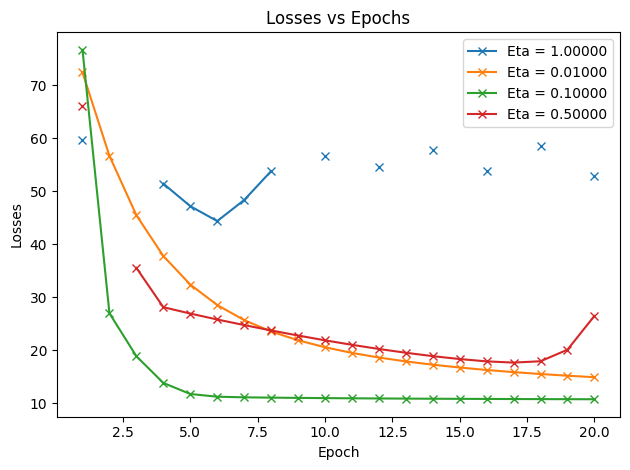

In [43]:
etas = [1, 0.01, 0.1, 0.5]
for idx, losses in enumerate(losses_list):
    label = "Eta = {:0.5f}".format(etas[idx])
    plt.plot(range(1, len(losses) + 1), losses, marker='x', label=label)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Losses vs Epochs")

plt.legend()
plt.tight_layout()

# Retrieval Pracrtice

## Converting an Adaline implementation into an algorithm for logistic regression
- We could simply substitute the cost function in our Adaline implementation with the new cost function.
- We need to swap the linear activation function with the sigmoid activation.
- We need to change the threshold function to return class labels 0 and 1, instead of –1 and 1.

In [44]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## Fit the LR Model on Iris data
- Let's consider only Iris-setosa and Iris-versicolor flower (classes 0 and 1 ) and check that our implementation of logistic regression works:

<ipython-input-11-3a2422982984>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


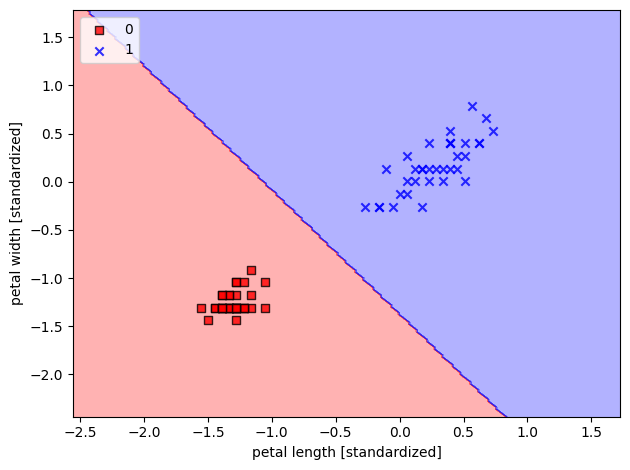

In [45]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

# Training a logistic regression model with scikit-learn
- Let us learn how to use scikit-learn'smore optimized implementation of logistic regression, which also supports multiclass settings off the shelf.
- In scikit-learn, we can select auto, ovr, multinomial for multiclass problem.

## Load the Iris Dataset
Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where `0=Iris-Setosa`, `1=Iris-Versicolor`, `2=Iris-Virginica`.

In [46]:
from sklearn import datasets

iris = datasets.load_iris()

In [47]:
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Split data into 70% training and 30% test data

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [49]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


## Standardize the features

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [52]:
# predict the test data
ypred = lr.predict(X_test_std)

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ypred)

0.9777777777777777

In [54]:
# prompt: compute the comfusion matrix given true and predicted labels.

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, ypred)
print(cm)


[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [55]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<ipython-input-11-3a2422982984>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


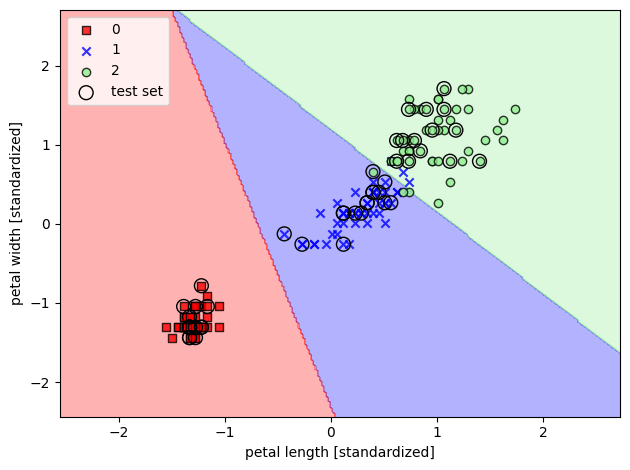

In [56]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

# Retrieval Pracrtice

## Choose Optimizer
- There exist many different optimization algorithms for solving optimization problems. For minimizing convex loss functions, such as the logistic regression loss, it is recommended to use more advanced approaches than regular stochastic gradient descent (SGD).
- Scikit-learn implements a whole range of such optimization algorithms, which can be specified via the solver parameter, namely, `newton-cg`, `lbfgs`, `liblinear`,  `sag`, and `saga`.

Predict probabilities:

In [57]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [58]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [59]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [60]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

## Tackling overfitting via regularization
- What is the mysterious parameter $C$ in `LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')`?
- The parameter $C$ that is implemented for the `LogisticRegression` class in scikit-learn is the inverse of regularization parameter, $\lambda$.
- What is regularization?

### Overfitting and underfitting
- Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data).
- If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters, leading to a model that is too complex given the underlyingdata.
- Similarly, our model can also suffer
from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.
<img src="https://i.imgur.com/ei07ag6.png" width=800>

## Nonlinearly Separable Data
- The following two sets of data are not separable by any linear line
<img src="https://i.imgur.com/HtvJMxf.png" width=800>
- However, adding a polynomial term in the linear combination will separate the data sets:
<img src="https://i.imgur.com/oMA9Sb8.png" width = 800>
- The question is how to control the right amount of nonlinear terms?

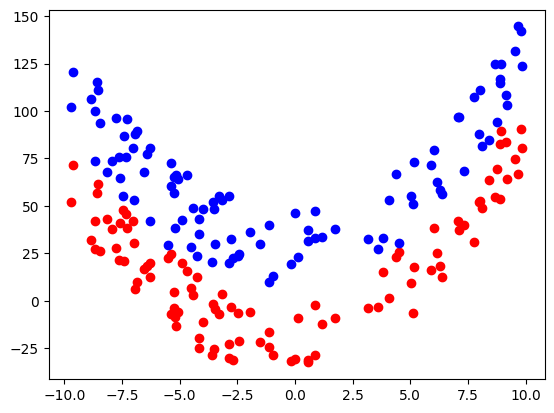

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the function
def f(x):
    return 1 + x + x**2

# Create the x values
x = np.linspace(-10, 10, 1000)

# Create the y values
y = f(x)

# Create the x values
x1 = np.random.uniform(-10, 10, size=100)

y1 = f(x1)

y_below = y1 - np.random.uniform(0, 40, size=100)

# Create the points above the curve
y_above = y1 + np.random.uniform(0, 50, size=100)

# Plot the curve
#plt.plot(x, y)

# Plot the points below the curve in red
plt.scatter(x1, y_below, color='red')

# Plot the points above the curve in blue
plt.scatter(x1, y_above, color='blue')

# Show the plot
#plt.savefig("/content/drive/MyDrive/Colab Notebooks/courses/INFO213/lectures/nonlinearly_separable_data.png")
plt.show()


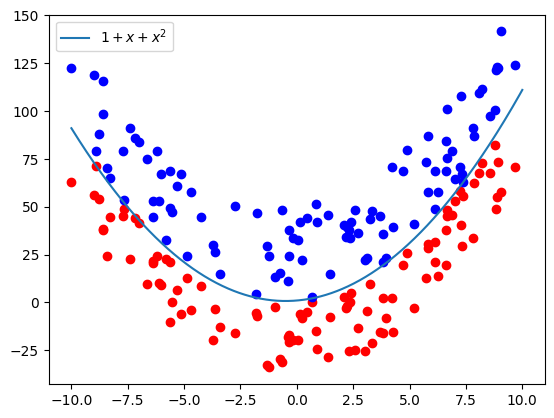

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the function
def f(x):
    return 1 + x + x**2

# Create the x values
x = np.linspace(-10, 10, 1000)

# Create the y values
y = f(x)

# Create the x values
x1 = np.random.uniform(-10, 10, size=100)

y1 = f(x1)

y_below = y1 - np.random.uniform(0, 40, size=100)

# Create the points above the curve
y_above = y1 + np.random.uniform(0, 50, size=100)

# Plot the curve
plt.plot(x, y, label="$1+x+x^2$")

# Plot the points below the curve in red
plt.scatter(x1, y_below, color='red')

# Plot the points above the curve in blue
plt.scatter(x1, y_above, color='blue')

plt.legend()

# Show the plot
#plt.savefig("/content/drive/MyDrive/Colab Notebooks/courses/INFO213/lectures/Nonlinearly_separable_separated_by_curve.png")

plt.show()


# Retrieval Practice

### Regularization
- One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization.
- Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.
- The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter (weight) values.
- The most common form of regularization is so-called $L2$ regularization (sometimes alsocalled $L2$ shrinkage or weight decay), which can be written as follows:
\begin{equation}
    \frac{\lambda}{2}\lvert\lvert \mathbf{w} \rvert\rvert^2=\frac{\lambda}{2}\Sigma_j w_j^2, j=1...m
\end{equation}
- $\lambda$ is called regularization parameter.
- For regularization to work properly, features should be normalized in the same scale.
- The loss function is: $J(\mathbf{w}) = .... + \frac{\lambda}{2}\Sigma_j w_j^2$, $j=1...m$.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

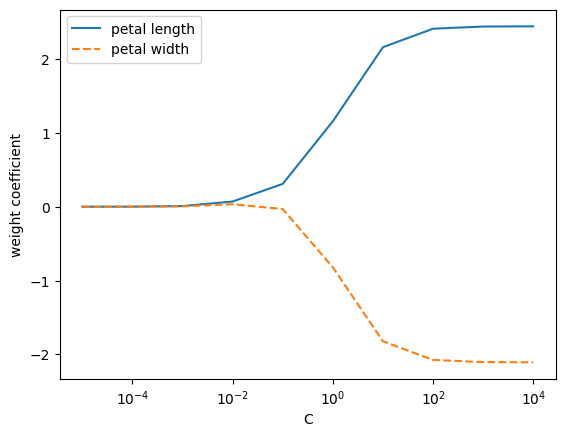

In [63]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('images/03_08.png', dpi=300)
plt.show()

## Update the weights of logistic regression with regularization
- Given input $\mathbf{x}=\{x_j^{(i)}\}$, $i=1...n, j=1...m$, and labels $\mathbf{y}=\{y^{(i)}\}$, where $y^{(i)}\in[0, 1]$, $i=1...n$.
- Initialize weights $\mathbf{w}=\{w_j\}$, $j=0...m$
- Compute $z^{(i)}=\mathbf{w}^{T}\mathbf{x}^{(i)}=w_0x_0^{(i)}+w_1x_1^{(i)}+...+w_mx_m^{(i)}$
- Compute $\bar{y}^{(i)}=\phi(z^{(i)})=\frac{1}{1+e^{-z^{(i)}}}$
- Calculate the loss: \begin{equation}
J(\mathbf{w}) = -\Sigma_i(y^{(i)} log(\bar{y}^{(i)})+(1-y^{(i)}) log(1-\bar{y}^{(i)}))+ \frac{\lambda}{2}\Sigma_j w_j^2, j=1...m
\end{equation}
- Update the weights by taking a step in the opposite direction of the gradient, $\nabla J(\mathbf{w})$ of our cost function $J(\mathbf{w})$:
 - $\mathbf{w} := \mathbf{w} + \Delta \mathbf{w}$, where $\Delta \mathbf{w}= - \eta \nabla J(\mathbf{w})$, specifically,
 \begin{equation}
\nabla J_j=\frac{\partial J}{\partial w_j} = - \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)} + \lambda w_j
\end{equation}
 - Update $w_0$ without regularization:
\begin{equation}
\Delta w_0 = - \eta \frac{\partial J}{\partial w_0} = \eta \Sigma_i(y^{(i)}-\phi(z^{(i)}))x_0^{(i)}
\end{equation}
 - Update the rest of $w_j$ with regularization:
\begin{equation}
\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta (\Sigma_i(y^{(i)}-\phi(z^{(i)}))x_j^{(i)} - \lambda w_j)
\end{equation}

# Retrieval Practice